In [2]:
import sys
import gc
from pathlib import Path
sys.path.append('/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/plots')

import lowda

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy.stats import binned_statistic_2d

In [3]:
import importlib
importlib.reload(lowda)

<module 'lowda' from '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/plots/lowda.py'>

In [57]:
lvl = 4

In [60]:
name = 'MW4_MHG0.25_GSE2_MHG0.5'
gal = lowda.load_gal(name, lvl, parttype=[0, 2, 4], 
                     fields=None,
                     idx_list=np.array([1600]))

loaded up to idx= 1600 time= 8.0
computing COM of idx= 1600
done with MW4_MHG0.25_GSE2_MHG0.5  took  00:00:04


In [61]:
nameiso = 'MW4iso_fg0.2_MHG0.25_RC9'
galiso = lowda.load_gal(nameiso, lvl, parttype=[0, 2, 4], 
                     fields=None,
                     idx_list=np.array([1600]))

loaded up to idx= 1600 time= 8.0
computing COM of idx= 1600
done with MW4iso_fg0.2_MHG0.25_RC9  took  00:00:00


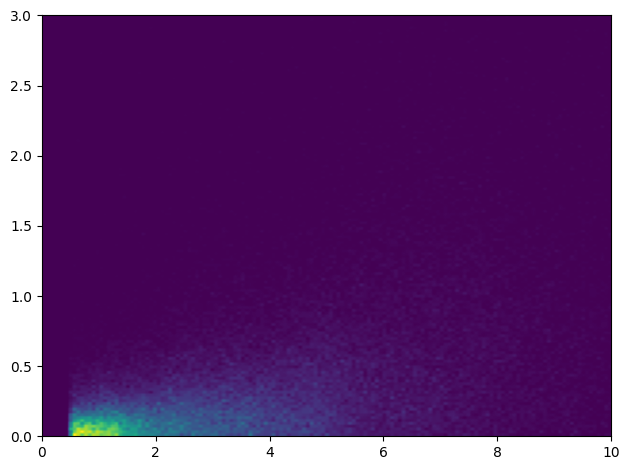

In [88]:
fig, ax = plt.subplots(1, 1)

idx = 1600
i = gal['i_from_idx'][idx]
sn = gal['sn_idx'][idx]
mass = sn.part4.PassiveScalars[:,1] * sn.part4.Masses.value

pos = sn.part4.rotpos
r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
z = pos[:,2]

xbins = np.linspace(0, 10, 150)
ybins = np.linspace(0, 3, 150)
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]

dx = (xbins[-1]-xbins[0])/len(xbins)
dy = (ybins[-1]-ybins[0])/len(ybins)

# key = R > 1
key = R > 0.5

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(R[key], np.abs(z[key]), mass[key],
                                                  statistic='sum', bins=(xbins, ybins))

# m_in_bin[m_in_bin < vmin] = vmin

im = ax.imshow(m_in_bin.T, origin='lower', extent=extent)#, norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax.set_aspect('auto')
# ax.set(xlabel='log(n) [cm^-3]', ylabel='log(T) [K]')

ax.set_xlim(xbins[0], xbins[-1])
ax.set_ylim(ybins[0], ybins[-1])

# ax.set_title('isolated')
fig.tight_layout()


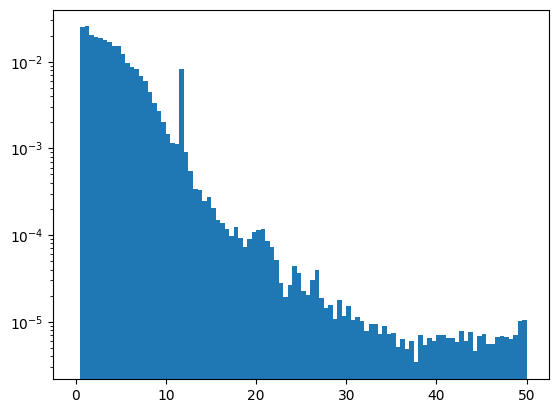

In [89]:
plt.hist(r[key], weights=mass[key], range=(0, 50), bins=100);
plt.yscale('log')

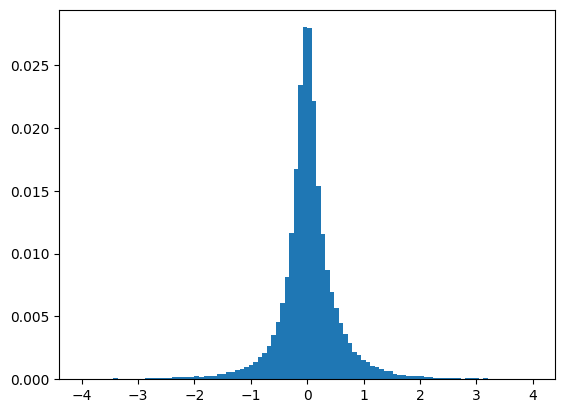

In [75]:
plt.hist(z[key], weights=mass[key], range=(-4, 4), bins=100);

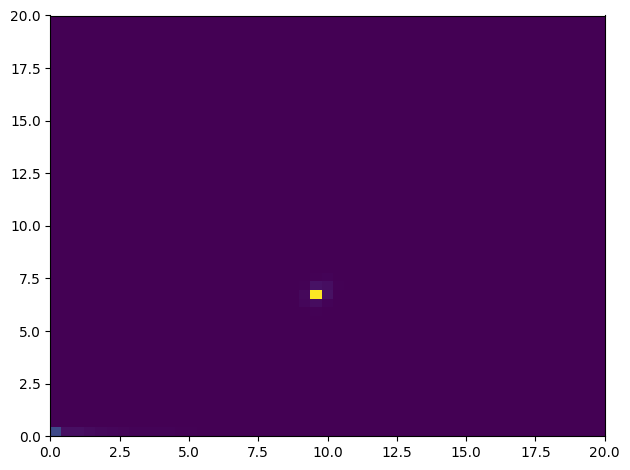

In [82]:
fig, ax = plt.subplots(1, 1)

idx = 1600
i = gal['i_from_idx'][idx]
sn = gal['sn_idx'][idx]
# mass = (sn.part4.PassiveScalars[:,2] + sn.part4.PassiveScalars[:,3]) * sn.part4.Masses.value
mass = (sn.part4.PassiveScalars[:,3]) * sn.part4.Masses.value
# mass = (sn.part4.PassiveScalars[:,2]) * sn.part4.Masses.value

pos = sn.part4.rotpos
r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
z = pos[:,2]

xbins = np.linspace(0, 20, 50)
ybins = np.linspace(0, 20, 50)
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]

dx = (xbins[-1]-xbins[0])/len(xbins)
dy = (ybins[-1]-ybins[0])/len(ybins)

# key = R > 1
key = R > -1

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(R[key], np.abs(z[key]), mass[key],
                                                  statistic='sum', bins=(xbins, ybins))

# m_in_bin[m_in_bin < vmin] = vmin

im = ax.imshow(m_in_bin.T, origin='lower', extent=extent)#, norm=mpl.colors.LogNorm())
ax.set_aspect('auto')
# ax.set(xlabel='log(n) [cm^-3]', ylabel='log(T) [K]')

ax.set_xlim(xbins[0], xbins[-1])
ax.set_ylim(ybins[0], ybins[-1])

# ax.set_title('isolated')
fig.tight_layout()


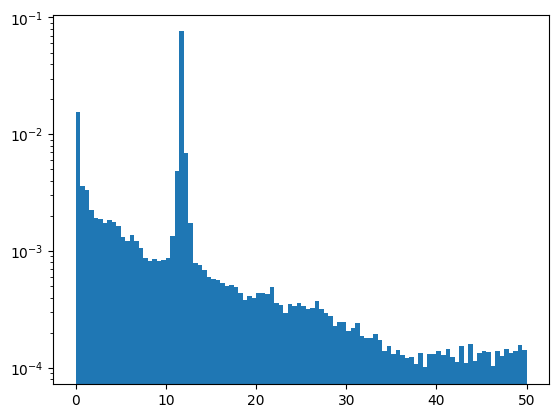

In [87]:
plt.hist(r[key], weights=mass[key], range=(0, 50), bins=100);
plt.yscale('log')

In [54]:
sn.part3.lol = 'a'